In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot as plt
sns.set()

In [2]:
madrid_houses = pd.read_csv('C:/Users/HP/OneDrive/Desktop/houses_Madrid.csv')

In [3]:
madrid_houses.sample(5)

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
8863,8863,12879,Chalet adosado en venta en calle Fernández Ci...,"Peñagrande, Madrid",407.0,335.0,5,5.0,3.0,335.0,...,D,True,NaN,NaN,True,0.0,True,True,True,True
9791,9791,11951,Piso en venta en Conde Orgaz-Piovera,"Hortaleza, Madrid",286.0,NaN,4,5.0,NaN,NaN,...,B,True,NaN,NaN,True,0.0,False,True,False,False
5943,5943,15799,Piso en venta en calle del Corregidor Juan Fra...,"Fontarrón, Madrid",71.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,False,True
20037,20037,1705,Dúplex en venta en Goya,"Barrio de Salamanca, Madrid",264.0,NaN,3,4.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,NaN,NaN,NaN,NaN
104,104,21638,Piso en venta en calle Diamante,"Los Rosales, Madrid",80.0,NaN,3,2.0,NaN,NaN,...,E,True,NaN,NaN,True,0.0,False,False,True,True


In [4]:
madrid_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

In [5]:
madrid_houses = madrid_houses.dropna(axis = 1 , how = 'all')
madrid_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  raw_address                   16277 non-null  object 
 11  is_exact_address_hidden       21742 non-null  bool   
 12  street_name                   15837 non-null  object 
 13  s

In [6]:
madrid_houses.duplicated().sum()

0

In [7]:
new_data = madrid_houses[['id' , 'subtitle' , 'sq_mt_built' , 'sq_mt_useful' , 'n_rooms' , 'n_bathrooms' , 'n_floors' , 'sq_mt_allotment'
                          ,'rent_price' , 'buy_price' , 'buy_price_by_area' , 'built_year' , 'parking_price']]
new_data.head()

,id,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,rent_price,buy_price,buy_price_by_area,built_year,parking_price
0,21742,"San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,471,85000,1328,1960.0,NaN
1,21741,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,666,129900,1856,NaN,NaN
2,21740,"San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,722,144247,1535,NaN,NaN
3,21739,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,583,109900,1717,1955.0,NaN
4,21738,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,1094,260000,2407,2003.0,0.0


In [8]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   subtitle           21742 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   sq_mt_useful       8228 non-null   float64
 4   n_rooms            21742 non-null  int64  
 5   n_bathrooms        21726 non-null  float64
 6   n_floors           1437 non-null   float64
 7   sq_mt_allotment    1432 non-null   float64
 8   rent_price         21742 non-null  int64  
 9   buy_price          21742 non-null  int64  
 10  buy_price_by_area  21742 non-null  int64  
 11  built_year         10000 non-null  float64
 12  parking_price      7719 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 2.2+ MB


In [9]:
new_data = new_data[['id' , 'subtitle' , 'sq_mt_built' , 'n_rooms' , 'n_bathrooms' , 'rent_price' , 'buy_price' , 'buy_price_by_area' , 
                    ]]

In [10]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   subtitle           21742 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   n_rooms            21742 non-null  int64  
 4   n_bathrooms        21726 non-null  float64
 5   rent_price         21742 non-null  int64  
 6   buy_price          21742 non-null  int64  
 7   buy_price_by_area  21742 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [11]:
 new_data.rename(columns = {'subtitle' : 'city'} , inplace = True)

In [12]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21742 non-null  int64  
 1   city               21742 non-null  object 
 2   sq_mt_built        21616 non-null  float64
 3   n_rooms            21742 non-null  int64  
 4   n_bathrooms        21726 non-null  float64
 5   rent_price         21742 non-null  int64  
 6   buy_price          21742 non-null  int64  
 7   buy_price_by_area  21742 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [24]:
new_data['n_bathrooms'] = new_data['n_bathrooms'].fillna(new_data['n_bathrooms'].mode())
new_data['n_bathrooms'] = new_data['n_bathrooms'].replace(0,1)

In [25]:
new_data['n_rooms'].describe()

count    21303.000000
mean         3.067690
std          1.462394
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         24.000000
Name: n_rooms, dtype: float64

In [26]:
new_data.drop(new_data.index[new_data['n_rooms'] == 0 ] , axis = 0 , inplace = True)

In [27]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21303 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21303 non-null  int64  
 1   city               21303 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21303 non-null  int64  
 4   n_bathrooms        21298 non-null  float64
 5   rent_price         21303 non-null  int64  
 6   buy_price          21303 non-null  int64  
 7   buy_price_by_area  21303 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.5+ MB


In [33]:
new_data['n_bathrooms'].mode()

0    1.0
Name: n_bathrooms, dtype: float64

In [31]:
new_data['n_bathrooms'] = new_data['n_bathrooms'].fillna(1)

In [32]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21303 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21303 non-null  int64  
 1   city               21303 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21303 non-null  int64  
 4   n_bathrooms        21303 non-null  float64
 5   rent_price         21303 non-null  int64  
 6   buy_price          21303 non-null  int64  
 7   buy_price_by_area  21303 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.5+ MB


In [34]:
new_data.dropna(subset = 'sq_mt_built' , inplace = True)

In [35]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   city               21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21177 non-null  float64
 5   rent_price         21177 non-null  int64  
 6   buy_price          21177 non-null  int64  
 7   buy_price_by_area  21177 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.5+ MB


In [36]:
new_data['n_bathrooms'] = new_data['n_bathrooms'].astype(int) 

In [37]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   city               21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21177 non-null  int32  
 5   rent_price         21177 non-null  int64  
 6   buy_price          21177 non-null  int64  
 7   buy_price_by_area  21177 non-null  int64  
dtypes: float64(1), int32(1), int64(5), object(1)
memory usage: 1.4+ MB


In [41]:
new_data.sample(10)

,id,city,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area
8600,13142,"Fuencarral, Madrid",657.0,7,5,-59721,2260000,3440
16860,4882,"Puerta Bonita, Madrid",74.0,3,1,666,130000,1757
7251,14491,"Valdezarza, Madrid",73.0,3,1,894,193000,2644
5486,16256,"Palomeras sureste, Madrid",61.0,3,1,566,106000,1738
21186,556,"Huertas-Cortes, Madrid",119.0,3,1,1873,590000,4958
13757,7985,"Pueblo Nuevo, Madrid",56.0,3,1,721,144000,2571
17463,4279,"Palacio, Madrid",47.0,1,1,884,190000,4043
9855,11887,"Canillas, Madrid",116.0,3,1,1275,330000,2845
973,20769,"El Cañaveral - Los Berrocales, Madrid",97.0,2,2,1197,299000,3082
2679,19063,"Bellas Vistas, Madrid",100.0,3,3,1024,235000,2350


In [44]:
for x in new_data['rent_price'] :
    if x < 0 :
        new_data['rent_price'] = 0

,id,city,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area
10303,11439,"Virgen del Cortijo - Manoteras, Madrid",68.0,1,1,0,356000,5235
12847,8895,"Ciudad Lineal, Madrid",77.0,3,1,0,230000,2987
20739,1003,"Chopera, Madrid",92.0,3,1,0,300000,3261
12701,9041,"San Pascual, Madrid",144.0,4,2,0,540000,3750
6938,14804,"Moncloa, Madrid",330.0,5,6,0,885000,2682
14281,7461,"Chamartín, Madrid",172.0,4,3,0,799000,4645
2918,18824,"Tetuán, Madrid",224.0,4,3,0,1100000,4911
10895,10847,"Valdebebas - Valdefuentes, Madrid",138.0,3,2,0,516000,3739
14870,6872,"Chamartín, Madrid",260.0,5,6,0,1580000,6077
7053,14689,"Argüelles, Madrid",116.0,3,2,0,795000,6853


In [53]:
new_data['strict']= new_data['city'].str.split(',' , expand = True)[0]

In [54]:
new_data.columns

Index(['id', 'city', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'rent_price',
       'buy_price', 'buy_price_by_area', 'strict'],
      dtype='object')

In [55]:
new_data = new_data[['id','strict' , 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'rent_price',
       'buy_price', 'buy_price_by_area']]

In [56]:
new_data.head()

,id,strict,sq_mt_built,n_rooms,n_bathrooms,rent_price,buy_price,buy_price_by_area
0,21742,San Cristóbal,64.0,2,1,0,85000,1328
1,21741,Los Ángeles,70.0,3,1,0,129900,1856
2,21740,San Andrés,94.0,2,2,0,144247,1535
3,21739,San Andrés,64.0,2,1,0,109900,1717
4,21738,Los Rosales,108.0,2,2,0,260000,2407


In [58]:
new_data.drop(columns = ['rent_price'], inplace = True)

In [59]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21177 entries, 0 to 21741
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   strict             21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21177 non-null  int32  
 5   buy_price          21177 non-null  int64  
 6   buy_price_by_area  21177 non-null  int64  
dtypes: float64(1), int32(1), int64(4), object(1)
memory usage: 1.7+ MB


In [60]:
new_data.to_csv('Madrid_cleaned_data.csv')

In [2]:
my_data = pd.read_csv('C:/Users/HP/OneDrive/Desktop/Madrid_cleaned_data.csv')

In [3]:
my_data.head()

,Unnamed: 0,id,strict,sq_mt_built,n_rooms,n_bathrooms,buy_price,buy_price_by_area
0,0,21742,San Cristóbal,64.0,2,1,85000,1328
1,1,21741,Los Ángeles,70.0,3,1,129900,1856
2,2,21740,San Andrés,94.0,2,2,144247,1535
3,3,21739,San Andrés,64.0,2,1,109900,1717
4,4,21738,Los Rosales,108.0,2,2,260000,2407


In [4]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21177 entries, 0 to 21176
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         21177 non-null  int64  
 1   id                 21177 non-null  int64  
 2   strict             21177 non-null  object 
 3   sq_mt_built        21177 non-null  float64
 4   n_rooms            21177 non-null  int64  
 5   n_bathrooms        21177 non-null  int64  
 6   buy_price          21177 non-null  int64  
 7   buy_price_by_area  21177 non-null  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 1.3+ MB


In [6]:
my_data.columns

Index(['Unnamed: 0', 'id', 'strict', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'buy_price', 'buy_price_by_area'],
      dtype='object')

In [11]:
my_data = my_data[['id', 'strict', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'buy_price', 'buy_price_by_area']]

In [12]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21177 entries, 0 to 21176
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  int64  
 1   strict             21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21177 non-null  int64  
 5   buy_price          21177 non-null  int64  
 6   buy_price_by_area  21177 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.1+ MB


In [13]:
my_data['id'] = my_data['id'].astype('object')  

In [14]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21177 entries, 0 to 21176
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21177 non-null  object 
 1   strict             21177 non-null  object 
 2   sq_mt_built        21177 non-null  float64
 3   n_rooms            21177 non-null  int64  
 4   n_bathrooms        21177 non-null  int64  
 5   buy_price          21177 non-null  int64  
 6   buy_price_by_area  21177 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 1.1+ MB


In [35]:
my_data = my_data.rename(columns = {'strict' : 'district'})

C:\Users\HP\AppData\Local\Temp\ipykernel_17864\640835951.py:6: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_17864\640835951.py:6: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_17864\640835951.py:6: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_17864\640835951.py:6: UserWarning:

The figure layout has changed to tight



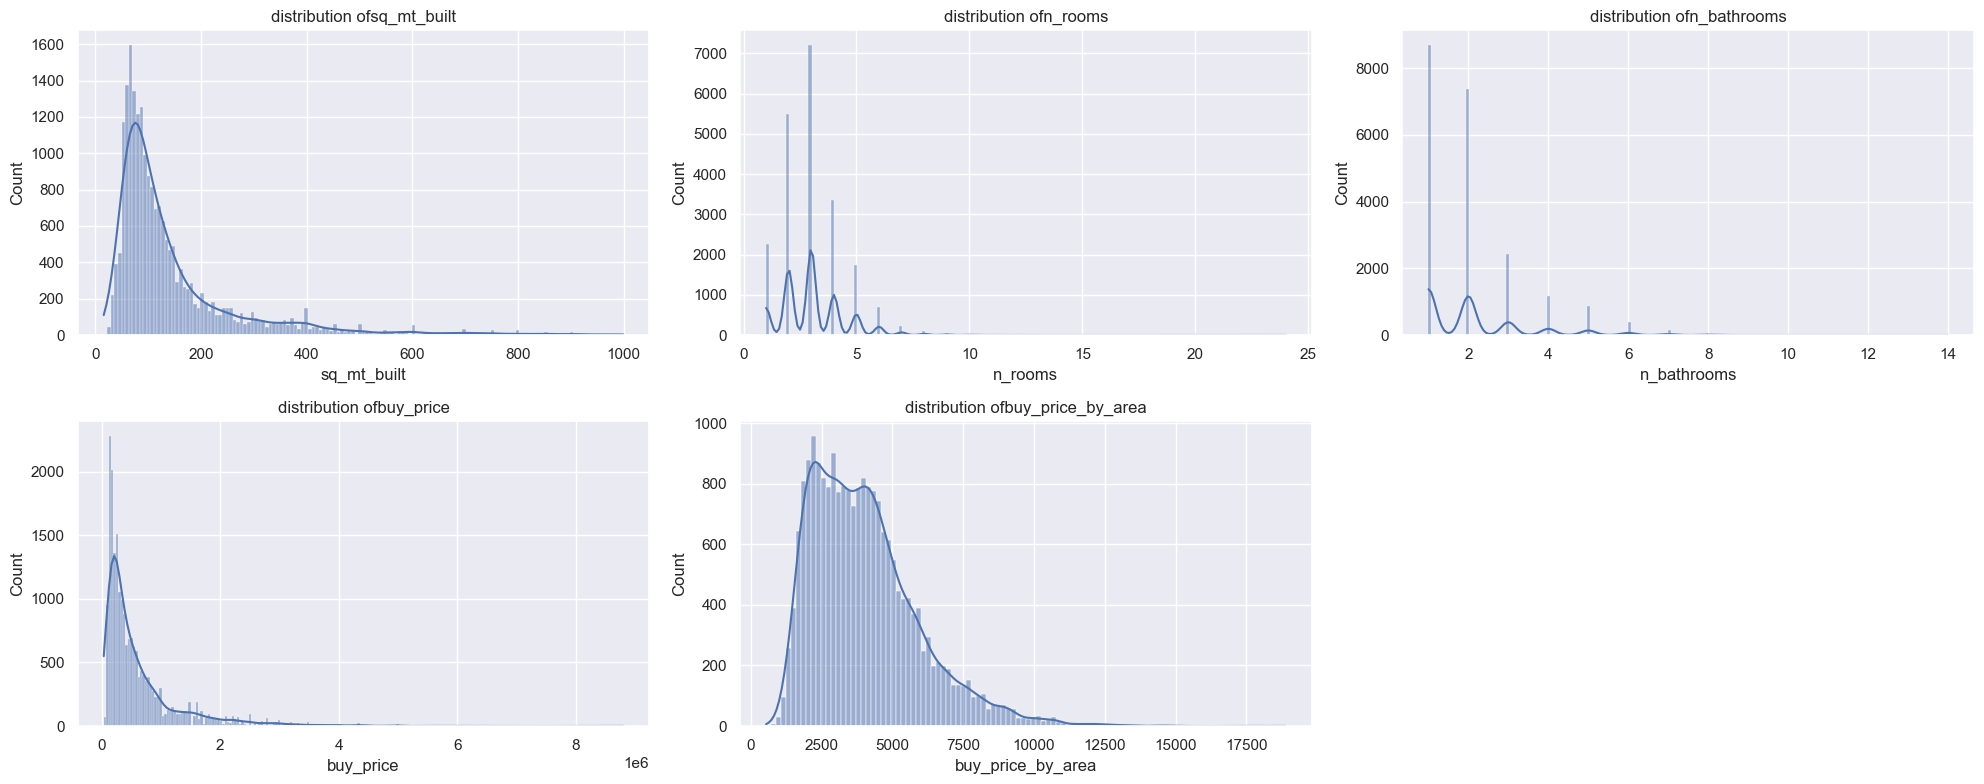

In [26]:
plt.figure(figsize =(20,8))
for x , y in enumerate(my_data.columns[2:]):
    plt.subplot(2,3,x+1)
    plt.title('distribution of' + y)
    sns.histplot(my_data[y] , kde = True)
    plt.tight_layout()

C:\Users\HP\AppData\Local\Temp\ipykernel_17864\2398370695.py:6: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_17864\2398370695.py:6: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_17864\2398370695.py:6: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_17864\2398370695.py:6: UserWarning:

The figure layout has changed to tight



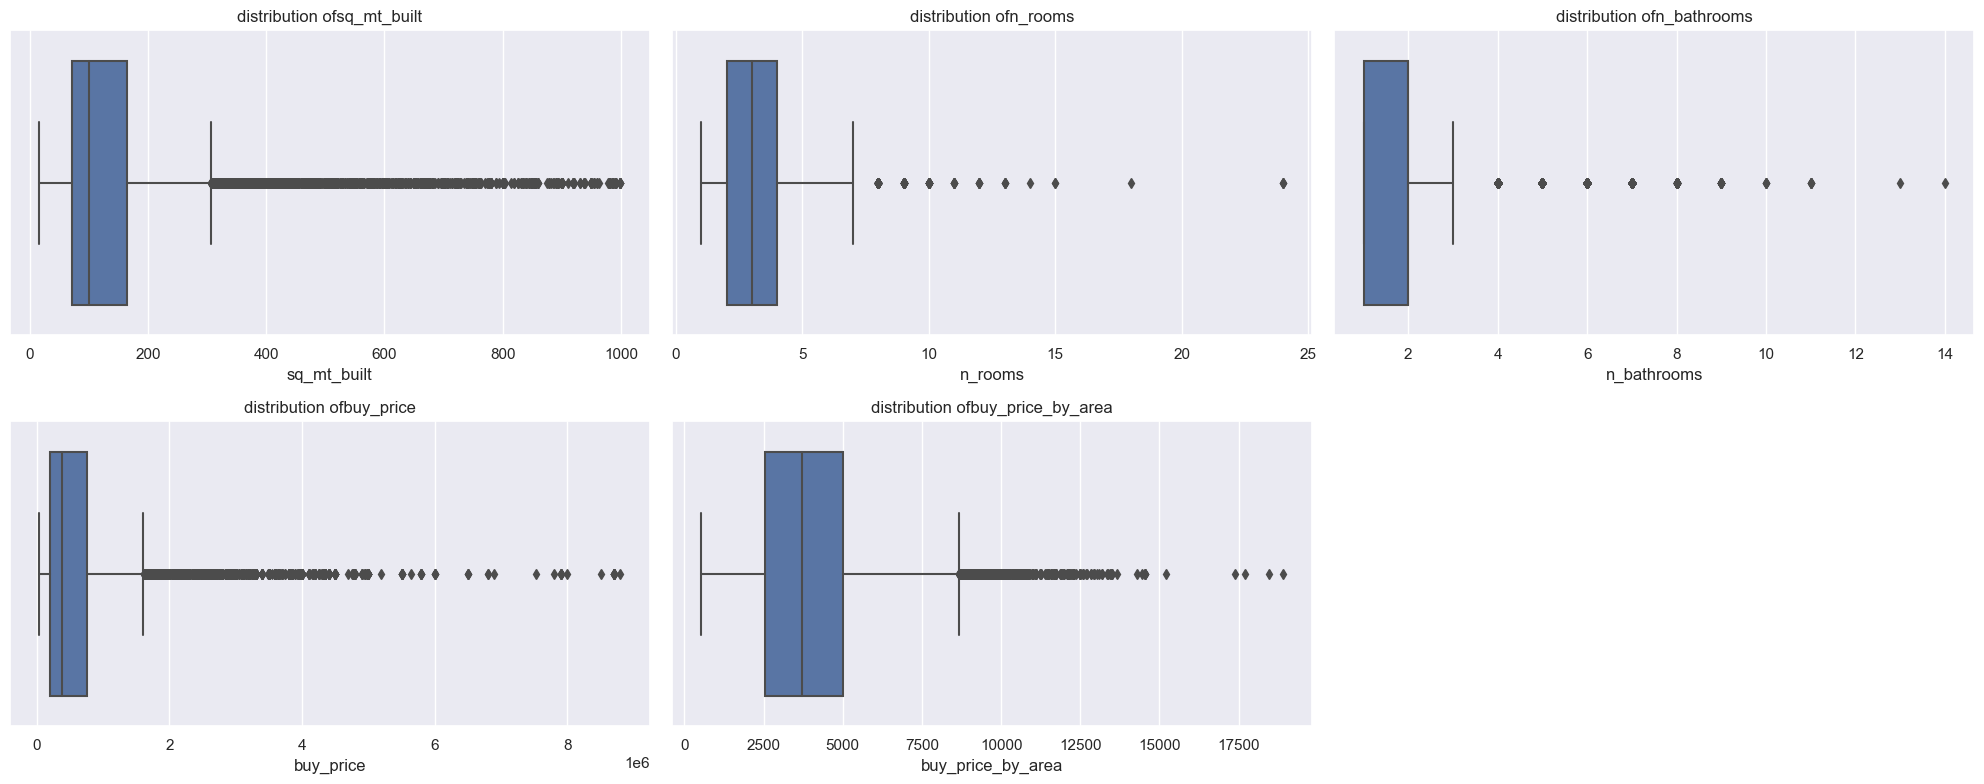

In [27]:
plt.figure(figsize =(20,8))
for x , y in enumerate(my_data.columns[2:]):
    plt.subplot(2,3,x+1)
    plt.title('distribution of' + y)
    sns.boxplot(x = my_data[y])
    plt.tight_layout()

In [39]:
px.bar(data_frame = my_data['district'].value_counts().head(25) , title = 'distribution of districts')

In [40]:
corr = my_data[['sq_mt_built', 'n_rooms', 'n_bathrooms']]

E:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight

C:\Users\HP\AppData\Local\Temp\ipykernel_17864\1912933774.py:2: UserWarning:

The figure layout has changed to tight



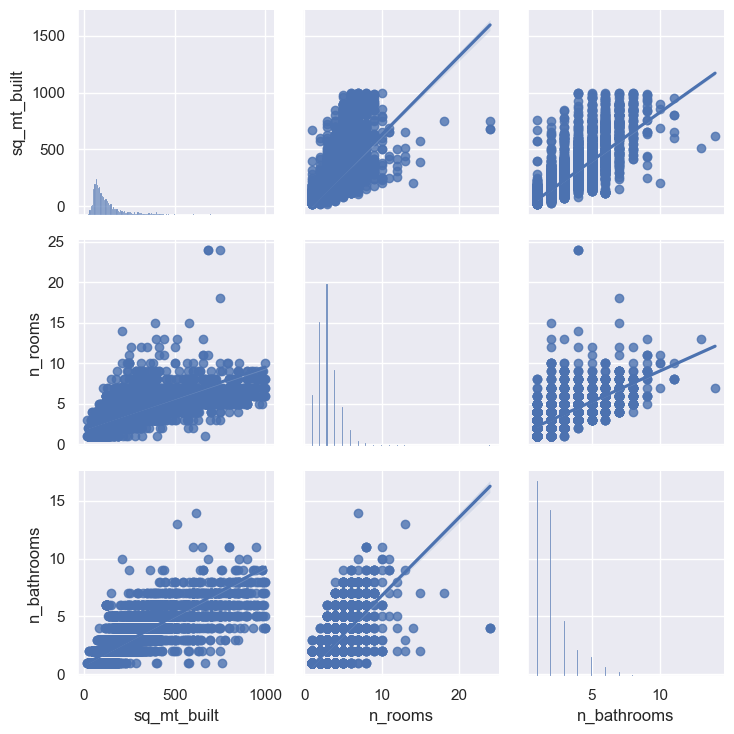

In [42]:
sns.pairplot(corr , kind = 'reg')
plt.tight_layout()

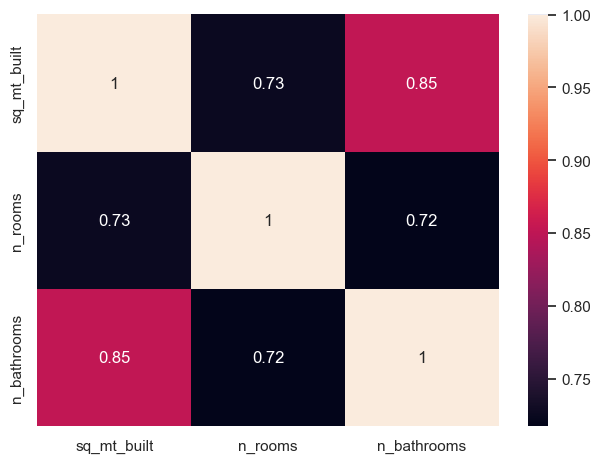

In [44]:
sns.heatmap(corr.corr() , annot = True)
plt.tight_layout()

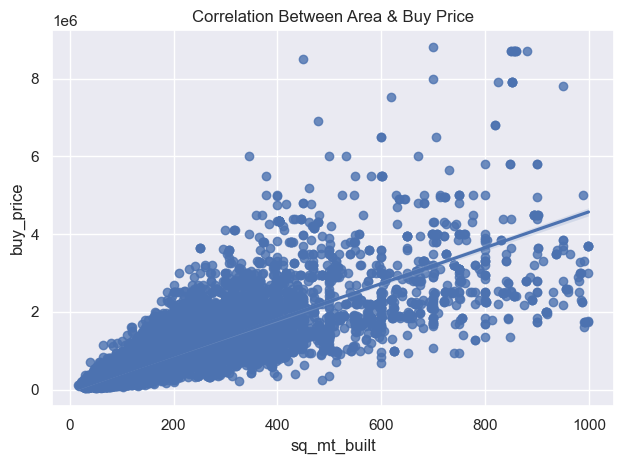

In [46]:
sns.regplot(data = my_data , x = 'sq_mt_built' , y = 'buy_price')
plt.xlabel = "Area/M2"
plt.ylabel = "buy_Price"
plt.title("Correlation Between Area & Buy Price")
plt.tight_layout()

In [50]:
mean_price = my_data.groupby('district' , as_index = False)['buy_price'].mean().sort_values('buy_price',ascending = False)
mean_price.head(10)

,district,buy_price
113,Recoletos,2.154973e+06
44,Conde Orgaz-Piovera,1.665784e+06
34,Chamartín,1.641533e+06
65,Hortaleza,1.525865e+06
17,Barrio de Salamanca,1.490861e+06
53,El Viso,1.475447e+06
5,Almagro,1.408616e+06
84,Moncloa,1.385313e+06
31,Castellana,1.376487e+06
40,Ciudad Universitaria,1.314436e+06


In [60]:
am =  my_data.groupby('district' , as_index = False)['buy_price'].mean().round(2).sort_values('buy_price',ascending = False).head(10)

In [61]:
px.bar(data_frame = am , x = 'district' , y = 'buy_price')

In [59]:
pm =  my_data.groupby('district' , as_index = False)['buy_price_by_area'].mean().round(2).sort_values('buy_price_by_area',ascending = False).head(10)
px.bar(data_frame = pm , x = 'district' , y = 'buy_price_by_area')